In [2]:
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle

%matplotlib inline

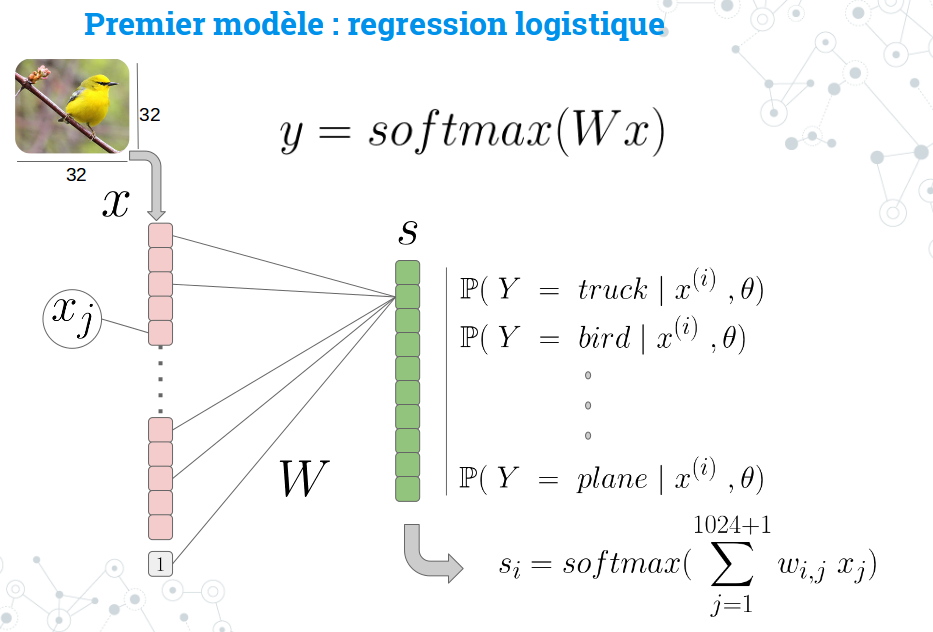

In [3]:
Image(filename='../ressources/regression_logistique.png') 

- modèle non profond (pas de couche cachée)
- données déjà préparées : liste de vecteurs de dimension 1024 (image noir et blanc) 
- découpage train/test déjà fait ! (voir script de préparation)

### La caisse à outils : 

In [25]:
# Point de départ
from keras.models import Sequential

# Couches nécessaires
from keras.layers import Dense, Activation

# Régularisation ? 
from keras.regularizers import l2

# Algorithme d'optimisation 
from keras.optimizers import SGD

# Pour le one-hot encoding
from keras.utils.np_utils import to_categorical

# Les données

In [8]:
# encodage utilisé pour les labels
labels_dict = {0:'airplane',
               1:'automobile', 
               2:'bird',
               3:'cat',
               4:'deer',
               5:'dog',
               6:'frog',
               7:'horse',
               8:'ship', 
               9:'truck'}

In [4]:
# Charger les données déjà préaprées
data = '../data/train.pkl'
X_train, X_test, y_train, y_test = pickle.load(open( data, "rb" ))

In [5]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(42500, 1024)
(42500,)
(7500, 1024)
(7500,)


5
dog


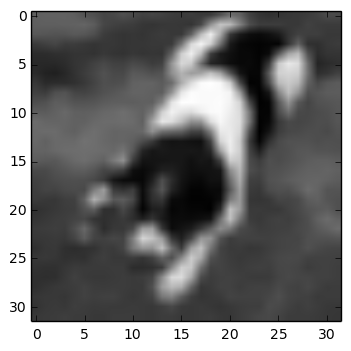

In [10]:
ind = 11

plt.imshow(X_train[ind].reshape((32,32)),cmap='gray')
print y_train[ind]
print labels_dict[y_train[ind]]

# Construire le modèle 

In [22]:
model = Sequential()
model.add((Dense(10, input_shape=(1024,), W_regularizer=l2(0.001))))
model.add(Activation('softmax'))

In [23]:
# Afficher des informations sur le modèles 
# nombre de paramètres et dimension des couches intermédiaires 
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_16 (Dense)                 (None, 10)            10250       dense_input_2[0][0]              
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_16[0][0]                   
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
____________________________________________________________________________________________________


# Compiler le modèle

In [27]:
sgd = SGD(lr=0.001)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement

In [28]:
batch_size = 64
nb_epoch = 15

model.fit(X_train,to_categorical(y_train, nb_classes=10),
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          verbose=1,
          validation_data = (X_test,to_categorical(y_test,nb_classes=10)))

Train on 42500 samples, validate on 7500 samples
Epoch 1/15
42500/42500 [==============================] - 8s - loss: 13.9355 - acc: 0.1356 - val_loss: 13.8509 - val_acc: 0.1411

Si l'entraînement vous convient, on peut passer à l'inférence sur de nouvelles données ! 

PS : nous verrons plus tard des outils plus avancés pour la gestion de l'entraînement.
- Checkpoint
- EarlyStop


# Inférence

# Sauver son modèle 

#### Uniquement l'architecture du modèle dans un fichier json



In [29]:
import json

json_string = model.to_json()

with open('model.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [30]:
cat model.json

"{\"class_name\": \"Sequential\", \"keras_version\": \"1.2.0\", \"config\": [{\"class_name\": \"Dense\", \"config\": {\"W_constraint\": null, \"b_constraint\": null, \"name\": \"dense_16\", \"output_dim\": 10, \"activity_regularizer\": null, \"trainable\": true, \"init\": \"glorot_uniform\", \"bias\": true, \"input_dtype\": \"float32\", \"input_dim\": 1024, \"b_regularizer\": null, \"W_regularizer\": {\"l2\": 0.0010000000474974513, \"name\": \"L1L2Regularizer\", \"l1\": 0.0}, \"activation\": \"linear\", \"batch_input_shape\": [null, 1024]}}, {\"class_name\": \"Activation\", \"config\": {\"activation\": \"softmax\", \"trainable\": true, \"name\": \"activation_2\"}}]}"

In [33]:
# Pour instacier un modèle depuis un fichier JSON : 
from keras.models import model_from_json

with open("model.json") as json_file:
    json_string = json.load(json_file)

model2 = model_from_json(json_string)

#### Uniquement les poids entraînés dans un fichier hdf5

In [34]:
model.save_weights('weights.h5')

In [35]:
# Pour charger les poids 
model.load_weights('weights.h5')

#### Achitecture + poids entraînés dans un fichier hdf5

In [36]:
model.save('model_weights.h5')

In [37]:
from keras.models import load_model
model3 = load_model('model_weights.h5')

/usr/local/lib/python2.7/dist-packages/keras/models.py:148: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
